In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
titanic=pd.read_csv("Titanic-Dataset.csv")

In [65]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [66]:
titanic=titanic.drop(['Name','Ticket','Fare','Cabin'],axis=1)

In [67]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,S
887,888,1,1,female,19.0,0,0,S
888,889,0,3,female,NaN,1,2,S
889,890,1,1,male,26.0,0,0,C


In [68]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         2
dtype: int64

In [69]:
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Embarked'],
      dtype='object')


In [70]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic = titanic.dropna(subset=['Embarked'])
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,S
887,888,1,1,female,19.0,0,0,S
888,889,0,3,female,28.0,1,2,S
889,890,1,1,male,26.0,0,0,C


In [71]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [72]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 62.5+ KB


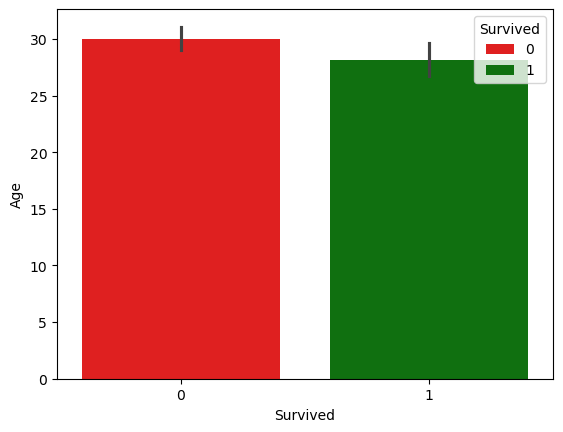

In [73]:
sns.barplot(x="Survived", y="Age", data=titanic, hue="Survived", palette={0: 'red', 1: 'green'})
plt.show()

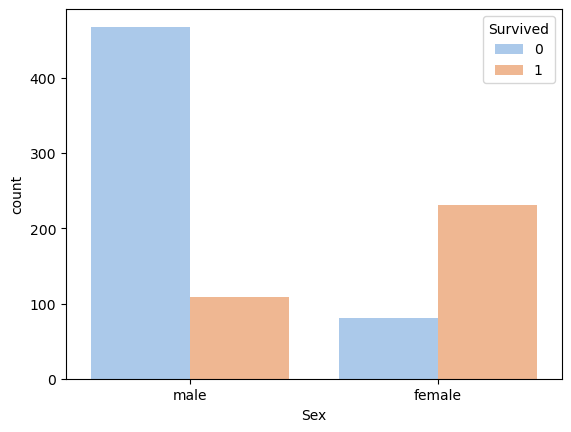

In [79]:
sns.countplot(x="Sex", hue="Survived", data=titanic,palette="pastel")
plt.show()

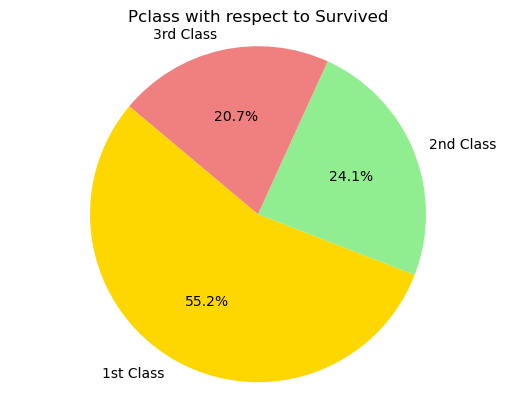

Pclass
3    491
1    214
2    184
Name: count, dtype: int64


In [88]:
class_counts = titanic['Pclass'].value_counts()
labels = ['1st Class', '2nd Class', '3rd Class']
colors = ['gold', 'lightgreen', 'lightcoral']
plt.pie(class_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Pclass with respect to Survived")
plt.show()
print(class_counts)

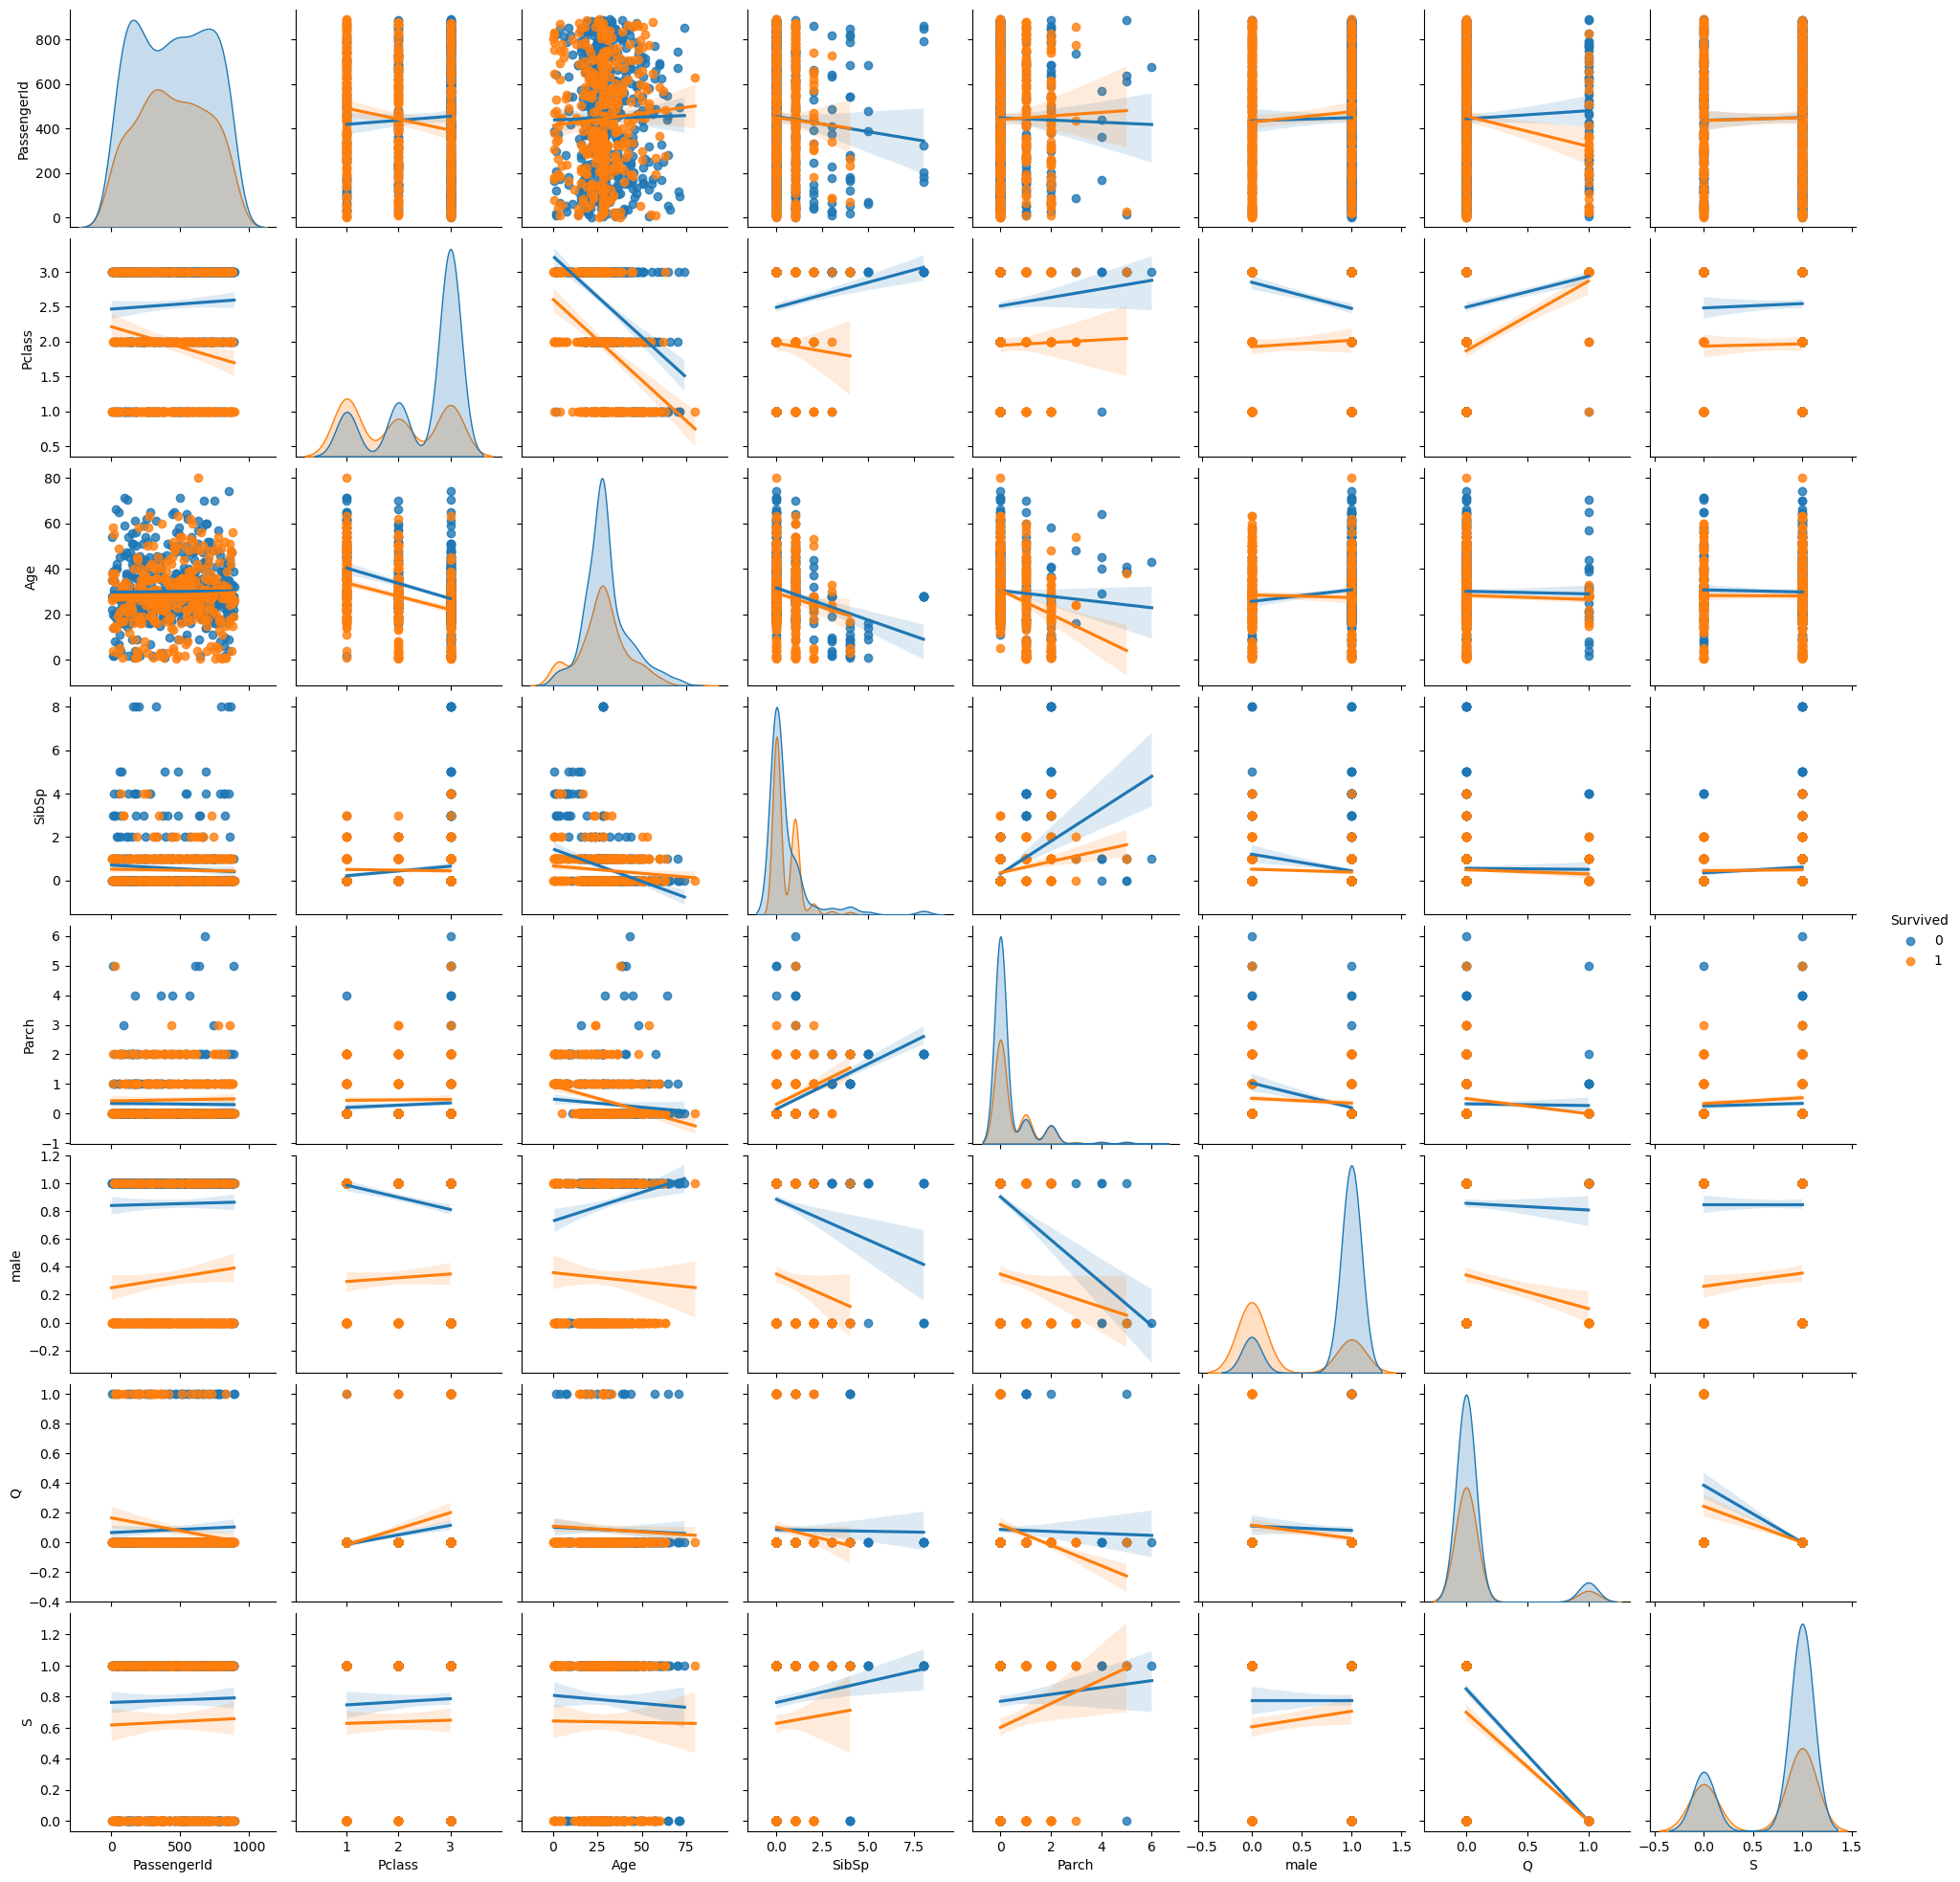

In [49]:
sns.pairplot(titanic,kind="reg",hue="Survived",diag_kws={"color": "Green"})
plt.show()

In [11]:
titanic_gen=pd.get_dummies(titanic["Sex"],dtype=int,drop_first=True)
titanic_gen

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [12]:
titanic_emb=pd.get_dummies(titanic["Embarked"],dtype=int,drop_first=True)
titanic_emb

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [13]:
titanic=pd.concat([titanic,titanic_gen,titanic_emb],axis=1)
titanic.drop(["Sex","Embarked"],axis=1,inplace=True)
titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,1,0,3,22.0,1,0,1,0,1
1,2,1,1,38.0,1,0,0,0,0
2,3,1,3,26.0,0,0,0,0,1
3,4,1,1,35.0,1,0,0,0,1
4,5,0,3,35.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,1,0,1
887,888,1,1,19.0,0,0,0,0,1
888,889,0,3,28.0,1,2,0,0,1
889,890,1,1,26.0,0,0,1,0,0


In [44]:
X=titanic[["PassengerId","Pclass","Age","SibSp","Parch","male","Q","S"]]
y=titanic["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,f1_score,precision_score
from sklearn.preprocessing import StandardScaler

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_data=X_train.join(y_train)
train_data

,PassengerId,Pclass,Age,SibSp,Parch,male,Q,S,Survived
708,709,1,22.0,0,0,0,0,1,1
240,241,3,28.0,1,0,0,0,0,0
382,383,3,32.0,0,0,1,0,1,0
792,793,3,28.0,8,2,0,0,1,0
683,684,3,14.0,5,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...
107,108,3,28.0,0,0,1,0,1,1
271,272,3,25.0,0,0,1,0,1,1
862,863,1,48.0,0,0,0,0,1,1
436,437,3,21.0,2,2,0,0,1,0


In [34]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (889, 8)
X_test shape: (178, 8)
y_train shape: (889,)
y_test shape: (178,)


In [33]:
X_train,y_train=titanic[["PassengerId","Pclass","Age","SibSp","Parch","male","Q","S"]],titanic["Survived"]
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1], dtype=int64)

In [35]:
y_test

281    0
435    1
39     1
418    0
585    1
      ..
433    0
807    0
25     1
85     1
10     1
Name: Survived, Length: 178, dtype: int64

In [43]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")
Precision=precision_score(y_test,y_pred)
print(f"Precision: {Precision:.2f}")
recall=recall_score(y_test,y_pred)
print(f"Recall: {recall:.2f}")
F1=f1_score(y_test,y_pred)
print(f"F1 score: {F1:.2f}")
print("Classification Report")
report=classification_report(y_test,y_pred)
print(report)

Accuracy: 0.78
Precision: 0.70
Recall: 0.74
F1 score: 0.72
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       109
           1       0.70      0.74      0.72        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



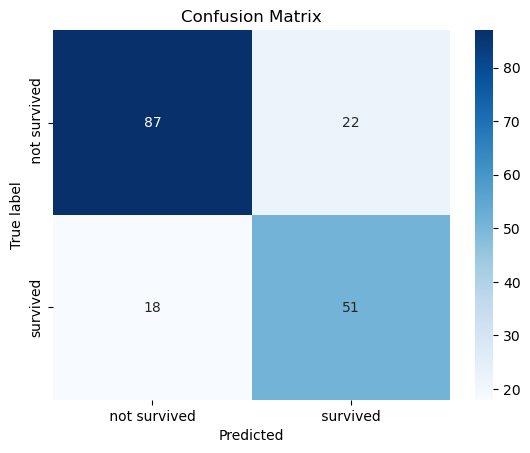

In [91]:
import matplotlib.pyplot as plt
conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=[" not survived "," survived "],yticklabels=[" not survived","survived"])
plt.xlabel("Predicted")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [93]:
data = {"PassengerId": [709], 'Pclass': [1] ,"Age":[22],"SibSp": [0],"Parch":[0],"male":[0],"Q":[1],"S":[1]}
trial_data = pd.DataFrame(data)
# Predict rating using trial data
predict_rating = model.predict(trial_data)
print('Predicted Rating for trial data: ',predict_rating[0])

Predicted Rating for trial data:  1
